In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

ls = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        ls.append(os.path.join(dirname, filename))
    ls[0]

import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

path = "/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images"
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Num GPUs Available:  0
There are 2 directories and 1 images in '/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images'.
There are 24 directories and 1 images in '/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images/test'.
There are 0 directories and 46 images in '/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images/test/jamali_kamali_tomb'.
There are 0 directories and 40 images in '/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images/test/charminar'.
There are 0 directories and 31 images in '/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images/test/Ajanta Caves'.
There are 0 directories and 45 

In [4]:
train_dir =  path + "/train/"
test_dir = path + "/test/"
train_dir

'/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images/train/'

In [5]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [6]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class
    

    random_image = random.sample(os.listdir(target_folder), 1)


    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))


  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Image shape: (404, 612, 3)


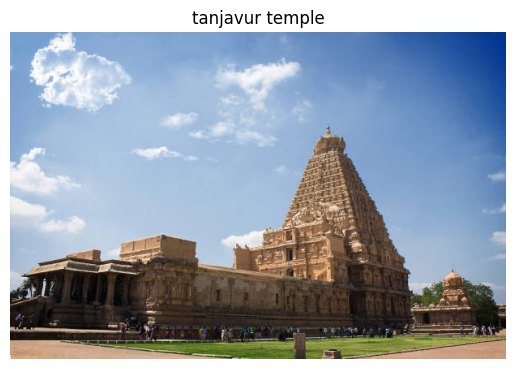

In [7]:
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) 

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')

Found 3666 images belonging to 24 classes.
Found 1052 images belonging to 24 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

# Define the model with an Input layer
model_10 = Sequential([
    Input(shape=(300, 300, 3)),       # Explicit input layer
    Conv2D(10, 3, activation='relu'), # No need for input_shape here
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(24, activation='softmax')
])

In [10]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=50,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

/opt/anaconda3/envs/MonumentDetection/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 33s 285ms/step - accuracy: 0.1568 - loss: 3.7157 - val_accuracy: 0.2814 - val_loss: 2.8264
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 33s 287ms/step - accuracy: 0.6562 - loss: 1.3700 - val_accuracy: 0.3764 - val_loss: 2.9298
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 35s 305ms/step - accuracy: 0.8942 - loss: 0.5083 - val_accuracy: 0.4002 - val_loss: 4.0012
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 327ms/step - accuracy: 0.9774 - loss: 0.1376 - val_accuracy: 0.4192 - val_loss: 4.8173
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 326ms/step - accuracy: 0.9958 - loss: 0.0494 - val_accuracy: 0.4278 - val_loss: 5.4689
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 336ms/step - accuracy: 0.9975 - loss: 0.0244 - val_accuracy: 0.4097 - val_loss: 5.6240
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 339ms/step - accuracy: 0.9982 - loss: 0.0335 - val_accuracy: 0.4287 - val_loss: 5.7350
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 342ms/step - accuracy: 0.9990 - loss: 0

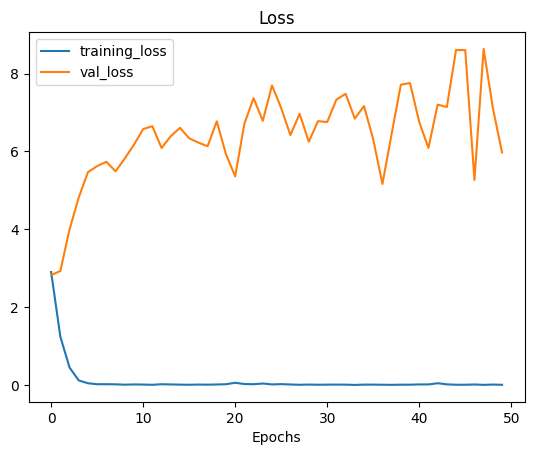

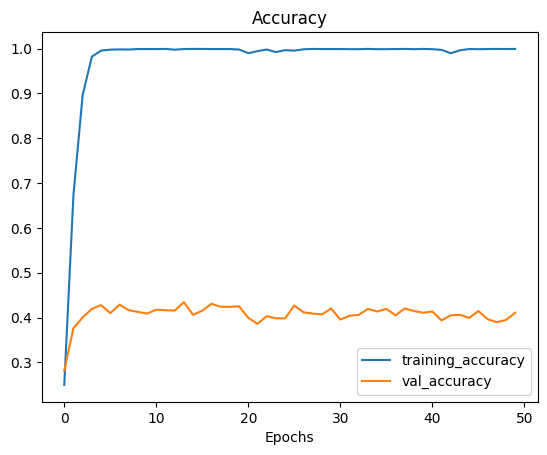

In [11]:
plot_loss_curves(history_10)

In [12]:
def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
    
  return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


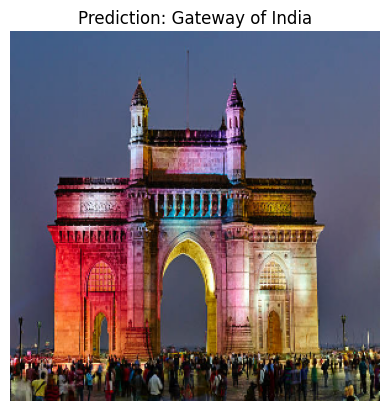

In [14]:
pred_and_plot(model_10, "/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images/test/Gateway of India/144.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


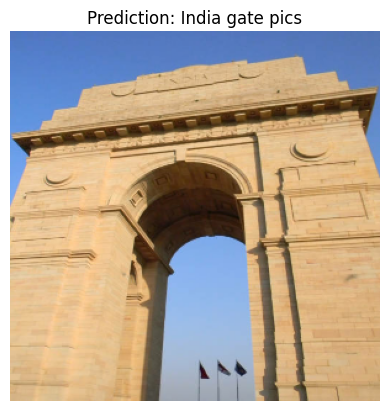

In [16]:
pred_and_plot(model_10, "/Users/parthsoni/VS Code/Monument Detection/indiaGate.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


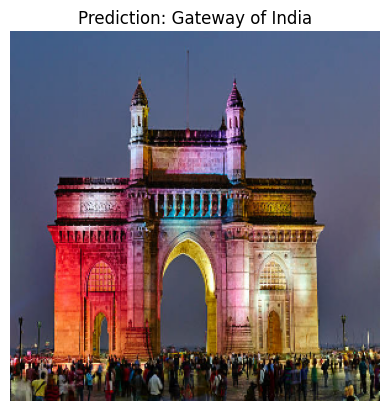

In [17]:
pred_and_plot(model_10, '/Users/parthsoni/VS Code/Monument Detection/gatewayOfIndia.jpg', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


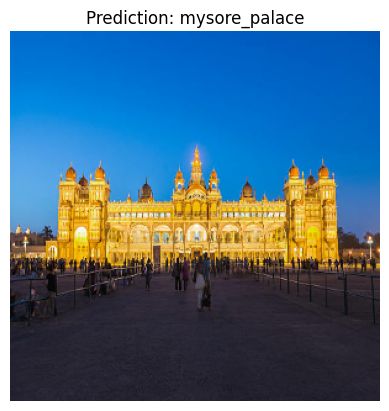

In [18]:
pred_and_plot(model_10, '/Users/parthsoni/.cache/kagglehub/datasets/danushkumarv/indian-monuments-image-dataset/versions/1/validation/Indian-monuments/images/test/mysore_palace/17.jpg', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


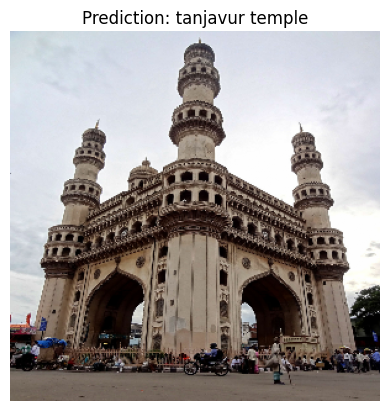

In [19]:
pred_and_plot(model_10,"/Users/parthsoni/VS Code/Monument Detection/charminar.jpg", class_names)

In [21]:
model_10.save("saved_trained_model")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=saved_trained_model.

In [22]:
model_10.save('my_combined_model.h5')

Model saved as a zip: /Users/parthsoni/VS Code/Monument Detection/monument_detection_model.zip
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step


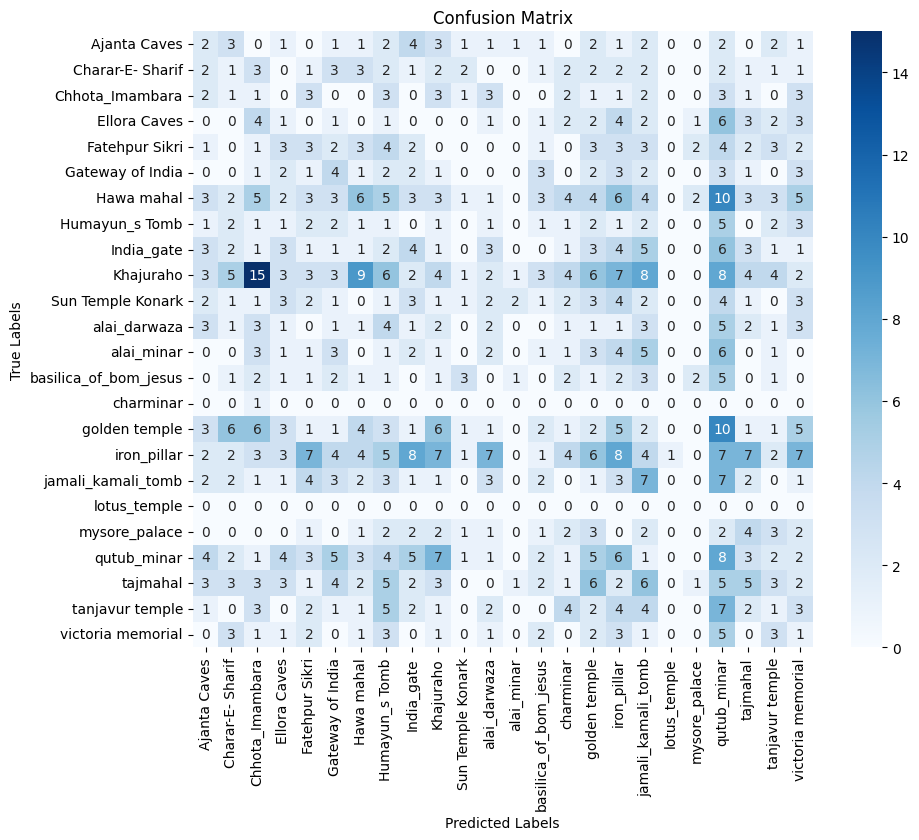

In [24]:
import zipfile
import os

directory = "/Users/parthsoni/VS Code/Monument Detection"


zip_file_name = '/Users/parthsoni/VS Code/Monument Detection/monument_detection_model.zip'


with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(directory):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory))


print("Model saved as a zip:", zip_file_name)


predictions = model_10.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

class_labels = list(test_data.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step


/opt/anaconda3/envs/MonumentDetection/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


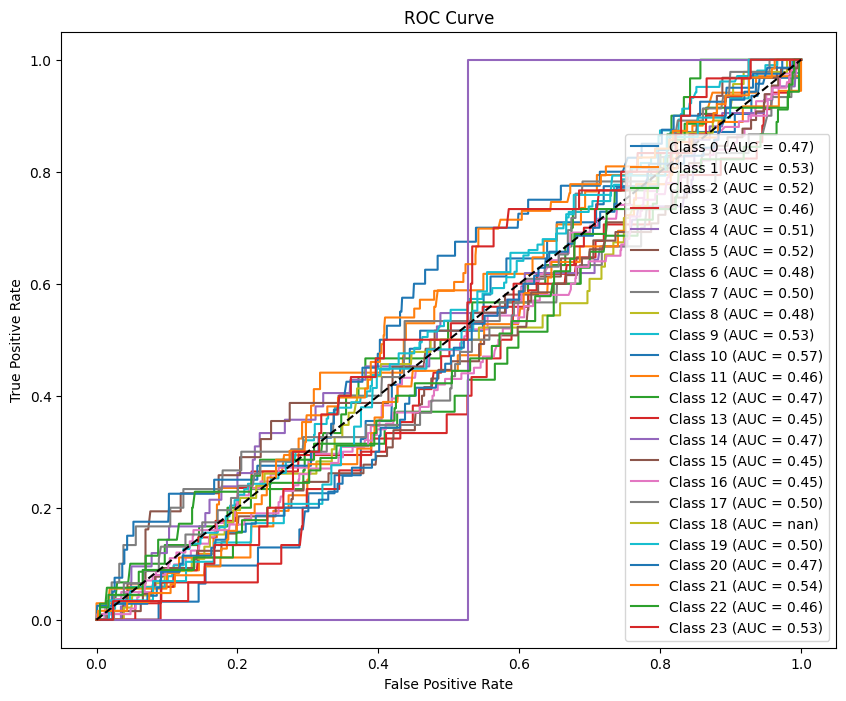

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

y_true = test_data.classes 
y_pred_probs = model_10.predict(test_data)

y_true_onehot = to_categorical(y_true, num_classes=len(test_data.class_indices))

plt.figure(figsize=(10, 8))
for i in range(len(test_data.class_indices)):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()